<p><img alt="Colaboratory logo" height="240px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Logo_EAFIT.svg/2560px-Logo_EAFIT.svg.png" align="center" hspace="350px" vspace="0px"></p>

# **<center> Análisis base de datos de Hurtos a personas en Medellín</center>**



<center>


*Jeferson Stiven Arboleda Colorado* \\


</center>





El conjunto de datos se obtuvo del [link](http://medata.gov.co/search/field_topic/seguridad-5/type/dataset?sort_by=changed&q=search/field_topic/seguridad-5/type/dataset&page=0%2C2). El cual tiene como última actualización el 30 de diciembre de 2022. A continución haremos una lectura de los datos

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv('/content/drive/MyDrive/Maestria_eafit/data/hurto_a_personas_301222.csv', sep=';', parse_dates=['fecha_hecho'])

<ipython-input-46-ca7d27e46181>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Maestria_eafit/data/hurto_a_personas_301222.csv', sep=';', parse_dates=['fecha_hecho'])


In [47]:
df.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01 01:00:00-05:00,1.0,6.299703,-75.582016,Mujer,33,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,Vía pública,Doce de Octubre,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
1,2017-01-01 15:00:00-05:00,1.0,6.250917,-75.566160,Mujer,26,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Candelaria,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
2,2017-01-01 14:00:00-05:00,1.0,6.274836,-75.554909,Hombre,30,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
3,2017-01-01 16:00:00-05:00,1.0,6.276236,-75.553533,Hombre,37,Casado(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
4,2017-01-01 16:00:00-05:00,1.0,6.250339,-75.586914,Hombre,87,Casado(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Billetera,Prendas de vestir y accesorios,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00


In [48]:
#Cantidad de registros
df.shape

(295405, 36)

Veamos información rápida acerca de las columnas

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295405 entries, 0 to 295404
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype                                 
---  ------               --------------   -----                                 
 0   fecha_hecho          295405 non-null  datetime64[ns, pytz.FixedOffset(-300)]
 1   cantidad             295405 non-null  float64                               
 2   latitud              281174 non-null  float64                               
 3   longitud             281174 non-null  float64                               
 4   sexo                 295405 non-null  object                                
 5   edad                 295405 non-null  int64                                 
 6   estado_civil         295405 non-null  object                                
 7   grupo_actor          295405 non-null  object                                
 8   actividad_delictiva  295405 non-null  object                    

In [50]:
df.fecha_hecho.dt.year.unique()

array([2017, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2020, 2019, 2018, 2021, 2022])

Nuestro análisis se centrará entre 2018-2022, por lo que podemos realizar un filtro por año

In [51]:
df['year'] = df.fecha_hecho.dt.year

Antes, veamos como se distribuye por años dichos casos

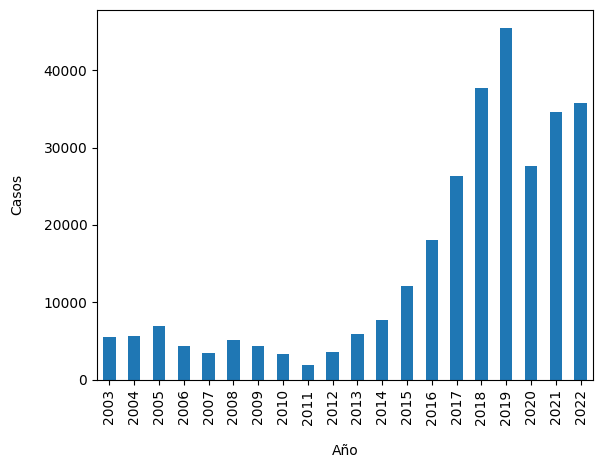

In [25]:
df.year.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("Año", labelpad=14)
plt.ylabel("Casos", labelpad=14);


Luego de aplicar el filtro de los años a trabajar, encontramos la siguiente cantidad de registros

In [52]:
df = df[df.year.isin([2018,2019,2020,2021,2022])].reset_index(drop=True)

In [53]:
df.shape

(181204, 37)

Hemos depurado en **114201** el número de registros. Veamos un poco acerca de las columnas de interes

In [54]:
df.drop(columns=['year'], inplace=True)

En cuanto a la modalidad de los hurtos, vemos como de forma partícular cuatro categorías se llevan el grueso del número de casos, por lo que es importante enfocar acciones encaminadas a estas modalidades.

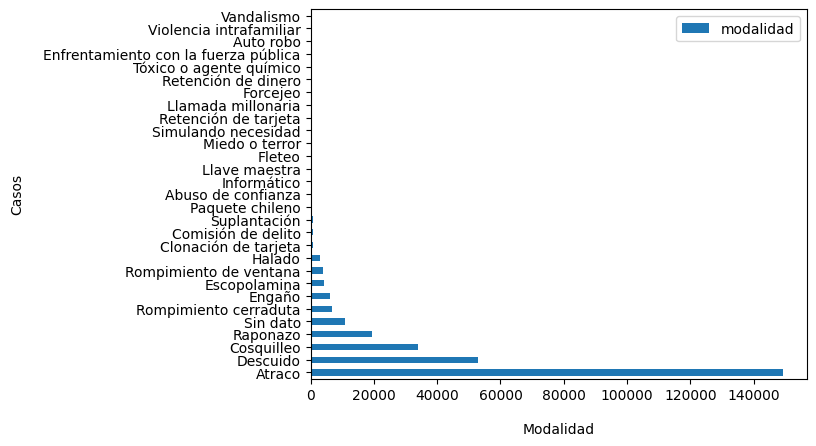

In [41]:
df.modalidad.value_counts().plot(kind='barh')
plt.xlabel("Modalidad", labelpad=14)
plt.ylabel("Casos", labelpad=14)
plt.legend();


Si nos fijamos, las anteriores modalidades están en línea con las armas o medios para cometer dichos delitos, esto se evidencia a continuación.

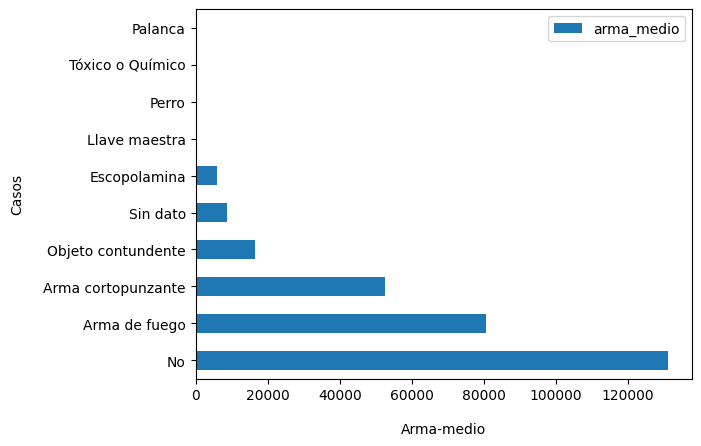

In [42]:
df.arma_medio.value_counts().plot(kind='barh')
plt.xlabel("Arma-medio", labelpad=14)
plt.ylabel("Casos", labelpad=14)
plt.legend();


In [ ]:
df.columns

Index(['fecha_hecho', 'cantidad', 'latitud', 'longitud', 'sexo', 'edad',
       'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',
       'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte',
       'nivel_academico', 'testigo', 'conducta', 'modalidad',
       'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal',
       'categoria_penal', 'nombre_barrio', 'codigo_barrio', 'codigo_comuna',
       'lugar', 'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien',
       'modelo', 'color', 'permiso', 'unidad_medida', 'fecha_ingestion'],
      dtype='object')

####**fecha_hecho**

In [ ]:
sum(df.fecha_hecho.isnull())

0

####**cantidad**

In [ ]:
df.cantidad

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
181199    1.0
181200    1.0
181201    1.0
181202    1.0
181203    1.0
Name: cantidad, Length: 181204, dtype: float64

In [ ]:
df.cantidad.unique()

array([1.])

Esta columna hace referencia a la cantidad de elementos hurtados, por lo que al parecer se tabulan los elementos de manera individual. Se debe determinar si hay alguna forma de aíslar los hechos o si en realidad es una mala ingesta de la característica. De momento esta columna se quita pues no aportaría nada en el análisis al tener un valor constante.

####**latitud**

In [ ]:
df.latitud

0         6.254597
1         6.233387
2         6.235646
3         6.254530
4         6.254163
            ...   
181199    6.251218
181200    6.249076
181201    6.289639
181202    6.264074
181203    6.242475
Name: latitud, Length: 181204, dtype: float64

In [ ]:
sum(df.latitud.isnull())

0

Al parecer no tenemos valores nulos. Veamos si tenemos registros fuera de lo común

In [ ]:
df[(df['latitud'] >6.38) |(df['latitud'] <6.15)]

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
61893,2020-08-20 13:30:00-05:00,1.0,6.144643,-75.606046,Mujer,70,Casado(a),Sin dato,Sin dato,Sin dato,...,Hospital o centro de salud,Sabaneta,Celular,Tecnología,Mercancía,-1,Oro,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
62577,2020-08-29 06:00:00-05:00,1.0,6.119620,-75.634554,Hombre,34,Soltero(a),Sin dato,Sin dato,Sin dato,...,Almacén tienda y otro,La Estrella,Celular,Tecnología,Mercancía,-1,Blanco,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
68373,2020-11-11 10:30:00-05:00,1.0,6.135533,-75.617717,Hombre,48,Casado(a),Sin dato,Sin dato,Sin dato,...,Fábrica o empresa,Sabaneta,Sin dato documentos,Documentos,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
83499,2018-11-28 22:00:00-05:00,1.0,4.598800,-74.074140,Mujer,37,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
156010,2022-07-22 13:45:00-05:00,1.0,0.000000,0.000000,Mujer,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
158562,2022-08-16 13:30:00-05:00,1.0,5.605000,-0.000679,Hombre,63,Casado(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
164727,2022-10-11 09:00:00-05:00,1.0,5.705000,-0.000679,Mujer,50,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
165506,2022-10-18 20:08:00-05:00,1.0,0.000000,0.000000,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
165924,2022-10-22 14:30:00-05:00,1.0,5.705000,-0.000679,Hombre,40,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
166813,2022-10-29 21:00:00-05:00,1.0,5.605000,-0.000679,Hombre,47,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00


**Los anteriores registros deben ser limpiados, ya que no se pueden tener latitudes por fuera del rango en mención en la ciudad de Medellín, lo que nos indica que fueron mal georreferenciados los valores.**

####**longitud**

In [ ]:
df.longitud

0        -75.564769
1        -75.544787
2        -75.563605
3        -75.562335
4        -75.622267
            ...    
181199   -75.592292
181200   -75.566827
181201   -75.556281
181202   -75.563416
181203   -75.563499
Name: longitud, Length: 181204, dtype: float64

In [ ]:
sum(df.longitud.isnull())

0

Al parecer no tenemos valores nulos. Veamos si tenemos registros fuera de lo común

In [ ]:
df[(df['longitud'] >-75.4)|(df['longitud'] <-76)]

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
83499,2018-11-28 22:00:00-05:00,1.0,4.598800,-74.074140,Mujer,37,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
137962,2021-08-08 13:00:00-05:00,1.0,6.179896,-75.337630,Mujer,42,Casado(a),Sin dato,Sin dato,Sin dato,...,Baño,Belén,Billetera,Prendas de vestir y accesorios,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
156010,2022-07-22 13:45:00-05:00,1.0,0.000000,0.000000,Mujer,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
158562,2022-08-16 13:30:00-05:00,1.0,5.605000,-0.000679,Hombre,63,Casado(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
164727,2022-10-11 09:00:00-05:00,1.0,5.705000,-0.000679,Mujer,50,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
165506,2022-10-18 20:08:00-05:00,1.0,0.000000,0.000000,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
165924,2022-10-22 14:30:00-05:00,1.0,5.705000,-0.000679,Hombre,40,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
166813,2022-10-29 21:00:00-05:00,1.0,5.605000,-0.000679,Hombre,47,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
167295,2022-11-02 13:00:00-05:00,1.0,5.605000,-0.000679,Hombre,-1,Soltero(a),Sin dato,Sin dato,Sin dato,...,"Hotel, motel y hostal",Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00
167334,2022-11-02 09:03:00-05:00,1.0,5.605000,-0.000679,Mujer,14,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Laureles,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-12-30T13:40:48.000-05:00


De nuevo, estos son valores que tenemos que tener en cuenta al momento de limpair la base, ya que no tienen sentido que estén acá.

####**sexo**

In [ ]:
sum(df.sexo.isnull())

0

In [ ]:
df.sexo.unique()

array(['Hombre', 'Mujer', 'Sin dato'], dtype=object)

In [ ]:
df.sexo.value_counts()

Hombre      104141
Mujer        77062
Sin dato         1
Name: sexo, dtype: int64

Se podría construir un indicador de densidad por sexo de personas que hurtan de acuerdo al número de aquellas que vivan en el lugar. Si no es así, no me parece tan viable dicha característica.

####**edad**

In [ ]:
sum(df.edad.isnull())

0

In [ ]:
df.edad.unique()

array([ 54,  36,  35,  38,  28,  49,  31,  61,  45,  41,  20,  46,  51,
        22,  39,  53,  63,  69,  32,  68,  24,  23,  29,  13,  21,  72,
        26,  19,  30,  59,  27,  25,  56,  47,  18,  -1,  66,  55,  33,
        70,  64,  52,  43,  17,  42,  34,  37,  62,  44,  48,  40,  50,
        58,  60,  57,  73,  15,  65,  16,  71,  74,  14,  77,  67,  90,
        85,  11,  12,  75,  82,  83,  84,  78,  87,  79,  81,  89,  92,
        10,  80,  76,   9,  86,   8,  88,  96,   4,  91,   1,   7,   2,
        94,   5,   3,   6,  93, 121,  95])

<AxesSubplot:>

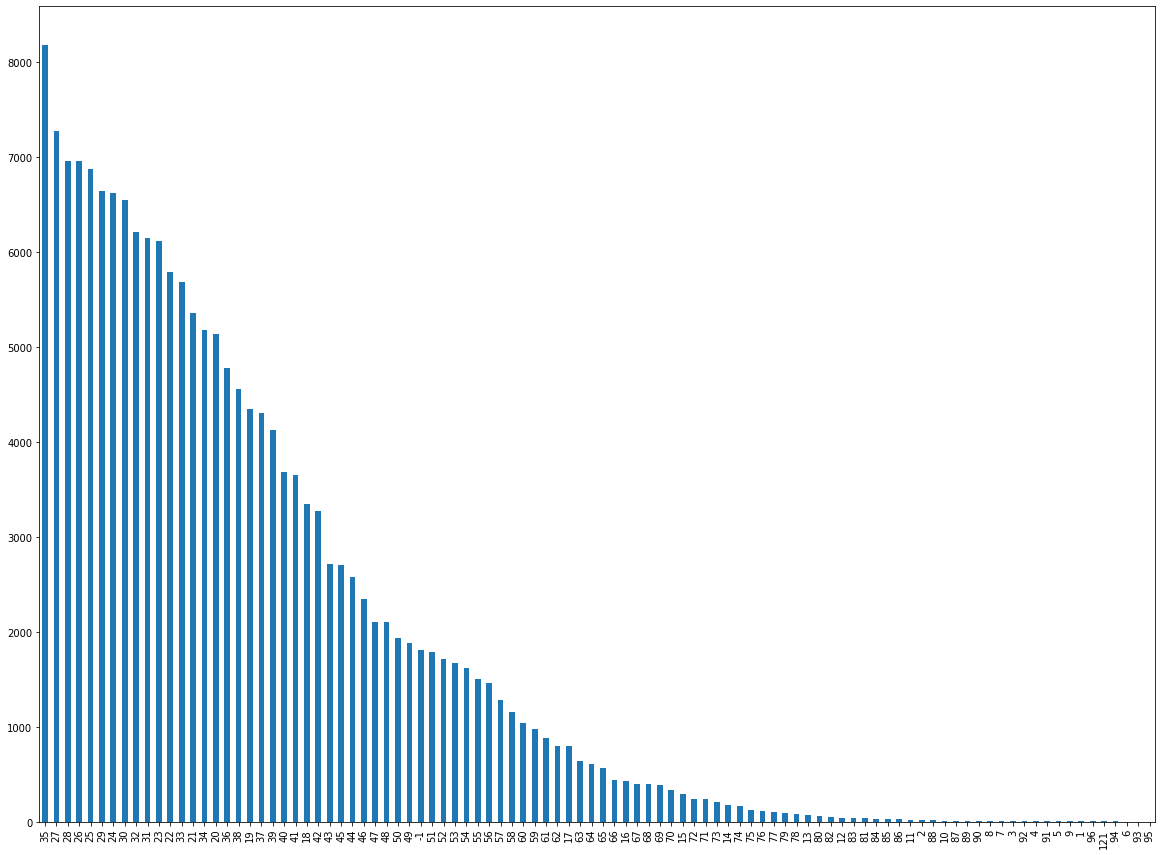

In [ ]:
df.edad.value_counts().plot(kind='bar', figsize=(20,15))


In [ ]:
1814/181204

0.010010816538266264

En este momento no veo claramente como ingresar la variable de edad en el análisis. 

####**estado_civil**

In [ ]:
sum(df.estado_civil.isnull())

0

Al parecer no tenemos valores nulos.

In [ ]:
df.estado_civil.unique()

array(['Divorciado(a)', 'Unión marital de hecho', 'Soltero(a)',
       'Casado(a)', 'Viudo(a)', 'Sin dato'], dtype=object)

In [ ]:
df.estado_civil.value_counts()

Soltero(a)                114074
Casado(a)                  32002
Unión marital de hecho     26008
Divorciado(a)               5258
Sin dato                    2316
Viudo(a)                    1546
Name: estado_civil, dtype: int64

####**grupo_actor**

In [ ]:
sum(df.grupo_actor.isnull())

0

No está claro la maner en que podemos ingresar el dato.

In [ ]:
df.grupo_actor.unique()

array(['Sin dato'], dtype=object)

Esta columna debe ser **removida** ya que no se tiene información sobre esta.

####**actividad_delictiva**

In [ ]:
sum(df.actividad_delictiva.isnull())

0

In [ ]:
df.actividad_delictiva.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.parentesco.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.ocupacion.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.discapacidad.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.grupo_especial.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.nivel_academico.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.testigo.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.conducta.unique() # No da información relevante

array(['Hurto a persona'], dtype=object)

In [ ]:
df.caracterizacion.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.articulo_penal.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.categoria_penal.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.permiso.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.unidad_medida.unique()

array(['Sin dato'], dtype=object)

In [ ]:
df.fecha_ingestion.unique()

array(['2022-12-30T13:40:48.000-05:00'], dtype=object)

Estas columnas deben ser **removidas** ya que no se tiene información sobre esta.

In [ ]:
df.medio_transporte.unique()

array(['Caminata', 'Automóvil', 'Motocicleta', 'Metro',
       'Motocicleta con parrillero', 'Autobus', 'Bicicleta', 'Taxi',
       'Planeador', 'Sin dato'], dtype=object)

In [ ]:
df.modalidad.unique()

array(['Raponazo', 'Atraco', 'Rompimiento cerraduta', 'Cosquilleo',
       'Descuido', 'Escopolamina', 'Sin dato', 'Halado',
       'Rompimiento de ventana', 'Comisión de delito', 'Engaño',
       'Paquete chileno', 'Simulando necesidad', 'Suplantación',
       'Llave maestra', 'Fleteo', 'Retención de dinero',
       'Clonación de tarjeta'], dtype=object)

In [ ]:
df.conducta_especial.unique()

array(['Sin dato', 'No', 'De celular', 'Fleteo', 'A taxista', 'De cable',
       'A bus de servicio público', 'A vehículo repartidor', 'Estafa',
       'Grupo delincuencial', 'Adulteración', 'Extorsión', 'Homicidio',
       'Medios informáticos', 'Violencia contra la mujer',
       'Plaza de vicio', 'Delito sexual', 'Vehículo servicio público',
       'Secuestro', 'Clonación de tarjeta', 'Paro o protesta',
       'De Aeronave', 'Vehículo particular'], dtype=object)

In [ ]:
df.arma_medio.unique()

array(['No', 'Arma de fuego', 'Arma cortopunzante', 'Objeto contundente',
       'Escopolamina', 'Llave maestra', 'Sin dato', 'Tóxico o Químico'],
      dtype=object)

In [ ]:
df.nombre_barrio.unique()

array(['Villa Nueva', 'Los Cerros el Vergel', 'El Salvador', 'El Salado',
       'Miranda', 'Alejandro Echavarría', 'Berlin', 'Rosales',
       'Bosques de San Pablo', 'Barrio Caycedo', 'La Candelaria', 'Sucre',
       'La Gloria', 'Villa Carlota', 'El Diamante', 'Barrio Colón',
       'El Velódromo', 'Altos del Poblado', 'Barrio Colombia',
       'Asomadera No.2', 'Carlos E. Restrepo', 'La Colina', 'Lorena',
       'Belén', 'Bolivariana', 'Manila', 'Las Palmas S.E.',
       'Villa Hermosa', 'Manrique Central No.1', 'Guayaquil',
       'Campo Amor', 'La Salle', 'Corazón de Jesús', 'Palermo',
       'Universidad de Antioquia', 'Perpetuo Socorro', 'U.P.B', 'Fátima',
       'Plaza de Ferias', 'Jesús Nazareno', 'Terminal de Transporte',
       'El Rodeo', 'Pajarito', 'Versalles No.1', 'La América',
       'Blanquizal', 'Los Balsos No.2', 'Santo Domingo Savio No.2',
       'El Poblado', 'San Benito', 'La Floresta', 'Naranjal',
       'La Castellana', 'Aranjuez', 'San Diego',
       'Área Ur

In [ ]:
df.codigo_barrio.unique()

array(['#1018', '#0904', '#0912', '#1316', '#0415', '#0905', '#0401',
       '#1602', '#0707', '#0906', '#1019', '#0809', '#1612', '#1403',
       '#0711', '#1013', '#1112', '#1408', '#1401', '#0915', '#1101',
       '#1511', '#1111', '#1603', '#1107', '#1419', '#9001', '#0801',
       '#0409', '#1007', '#1507', '#0301', '#1008', '#0403', 'Inst_11',
       '#1012', 'Inst_15', '#1601', 'Inst_1', '#1003', 'Inst_4',
       'Inst_20', '#0723', '#0309', '#1204', '#1302', '#1415', '#0102',
       '#1418', '#1006', '#1205', '#1103', '#1110', '#0413', '#1020',
       'AUC2', '#1417', '#0606', '#1114', '#0718', '#1005', '#0708',
       '#1016', '#1607', '#0508', '#1113', '#0703', '#0414', '#0208',
       '#1011', '#1410', 'Inst_19', '#1608', 'AE1', '#1615', '#0717',
       '#1306', '#1310', '#1001', '#1503', '#1411', '#1413', '#0607',
       '#0210', '#1201', '#0505', '#1421', '#1212', '#0712', '#1209',
       '#1420', 'Inst_18', '#1104', '#1108', '#0305', '#1604', '#0605',
       '#0602', '#12

In [ ]:
df.codigo_comuna.unique()

array([10, 9, 13, 4, 16, 7, 8, 14, 11, 15, 90, 3, 5, 12, 1, 80, 6, 2, 60,
       50, 70, '14', '15', '10', '9', '16', '12', '11', '7', '8', '5',
       '13', '4', '3', '70', '6', '1', '60', '80', '2', '90', '50',
       'SIN DATO'], dtype=object)

In [ ]:
df.lugar.unique()

array(['Vía pública', 'Residencia', 'Paradero de bus', 'Taller mecánico',
       'Almacén tienda y otro', 'Centro comercial', 'Turístico',
       'Bus de servicio público', 'Estación del Metro', 'Oficina',
       'Estación del Metro plus', 'Escenario deportivo', 'Banco',
       'Cafetería',
       'Institución educativa (jardín, primaria o secundaria)',
       'Sin dato', 'Vehículo particular', 'Casa o apartamento',
       'Hospital o centro de salud', 'Hotel, motel y hostal',
       'Instalación gubernamental',
       'Caseta vigilancia conjunto residencial', 'Conjunto residencial',
       'Bodega', 'Parqueadero', 'Local comercial', 'Puente peatonal',
       'Quebrada o rio', 'Fábrica o empresa', 'Terminal de transporte',
       'Parque', 'Supermercado', 'Edificio', 'Puesto de trabajo',
       'Cajero electrónico', 'Cementerio', 'Restaurante', 'Zona boscosa',
       'Bar o cantina', 'Estación de gasolina', 'Gimnasio',
       'Funeraria y sala de velación', 'Iglesia', 'Casino', 'Metro 

In [ ]:
df.sede_receptora.unique()

array(['Candelaria', 'Buenos Aires', 'San Javier', 'Aranjuez', 'Belén',
       'Castilla', 'Villa Hermosa', 'Poblado', 'Laureles', 'Manrique',
       'Popular', 'Doce de Octubre', 'Santa Cruz', 'San Antonio de Prado',
       'Bello', 'Sabaneta', 'Itagüí', 'Envigado', 'La Estrella',
       'Copacabana', 'Aeropuerto Olaya Herrera', 'Caldas'], dtype=object)

In [ ]:
df.bien.unique()

array(['Celular', 'Tarjeta bancaria', 'Libreta militar', 'Peso',
       'Licencia', 'Cédula', 'Accesorios prendas de vestir',
       'Alimento para animales', 'Tarjeta para computador',
       'Accesorios celular', 'Sin dato documentos', 'Bono',
       'Electrodoméstico video y audio y accesorios',
       'Elementos computador', 'Tablet', 'Libros', 'Carne', 'Billetera',
       'Bicicleta', 'Soat', 'Sin dato tecnología', 'Llave', 'Vcd',
       'Llaveros', 'Revisión técnico mecánica', 'Espejo',
       'Tarjeta de identidad', 'Maletín', 'Zapatos', 'Pasaporte',
       'Articulos electrónica', 'Autopartes', 'Módem', 'Computador',
       'Sin dato', 'Cdt', 'Agenda digital', 'Dólar', 'Ropa exterior',
       'Placa policial', 'Arnés', 'Encomiendas',
       'Documentación electoral', 'Expediente', 'Analgésico',
       'Portadocumentos', 'Repuestos para maquinaria y equipo',
       'Artículos de aseo personal', 'Cuenta de ahorro', 'Ventilador',
       'Certificado de gases', 'Decodificadores/tar

In [ ]:
df.categoria_bien.unique()

array(['Tecnología', 'Dinero, joyas, piedras preciosas y título valor',
       'Documentos', 'Prendas de vestir y accesorios', 'Fauna',
       'Electrodomésticos', 'Librería, Papelería y útiles', 'Alimento',
       'Vehículos de 2 o 4 ruedas', 'Herramientas', 'Otros elementos',
       'Maquinaria y equipo',
       'Autoparte y elementos de la mecánica automotriz', 'Sin dato',
       'Elementos para actividades al aire libre', 'Medicamento',
       'Accesorios del hogar', 'Muebles', 'Arma de fuego',
       'Elementos escolares', 'Artículos médicos',
       'Accesorios militares, policía o vigilancia privada', 'Munición',
       'Música', 'Elementos para guardar o almacenar', 'Combustible',
       'Artículos de fumador', 'Camionetas', 'Arma blanca',
       'Equipamiento vías y señalización', 'Software', 'Automóvil',
       'Licor', 'Químicos', 'Transporte aire',
       'Equipamiento servicios públicos', 'Materia prima',
       'Elementos para la iluminación', 'Flora',
       'Materiales 

In [ ]:
df.grupo_bien.unique()

array(['Mercancía', 'Vehículo', 'Sin dato', 'Bélico', 'Equipamiento',
       'Estupefaciente'], dtype=object)

In [ ]:
df.modelo.unique()

array([  -1, 2013, 2005, 2019, 2008, 2015, 2017, 2022,    0, 2018, 2020,
       2009, 2014, 2023, 2011, 2012, 2000, 2016, 1998, 1950, 2021])

In [ ]:
df.color.unique()

array(['Azul', 'Sin dato', 'Gris', 'Negro', 'Verde', 'Café', 'Oro',
       'Blanco', 'Rojo', 'Plata', 'Morado', 'Bronce', 'Rosado',
       'Amarillo', 'Beige', 'Naranja'], dtype=object)

* fecha_hecho,
* cantidad,
* latitud,
* longitud,
* sexo,
* edad,
* estado_civil,
* grupo_actor,
* actividad_delictiva,
* parentesco,
* ocupacion,
* discapacidad,
* grupo_especial,
* medio_transporte,
* nivel_academico,
* testigo,
* conducta,
* modalidad,
* caracterizacion,
* conducta_especial,
* arma_medio,
* articulo_penal,
* categoria_penal,
* nombre_barrio,
* codigo_barrio,
* codigo_comuna,
* lugar,
* sede_receptora,
* bien,
* categoria_bien,
* grupo_bien,
* modelo,
* color,
* permiso,
* unidad_medida,
* fecha_ingestion

In [55]:
borrar = ['fecha_ingestion','unidad_medida','permiso','categoria_penal','articulo_penal','caracterizacion','conducta','testigo','nivel_academico','grupo_especial','discapacidad','ocupacion','parentesco',
          'actividad_delictiva','grupo_actor','cantidad']

In [56]:
df.drop(columns=borrar, inplace=True)

In [57]:
df.shape

(181204, 20)

In [58]:
df.head()

,fecha_hecho,latitud,longitud,sexo,edad,estado_civil,medio_transporte,modalidad,conducta_especial,arma_medio,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color
0,2020-01-07 15:30:00-05:00,6.254597,-75.564769,Hombre,54,Divorciado(a),Caminata,Raponazo,Sin dato,No,Villa Nueva,#1018,10,Vía pública,Candelaria,Celular,Tecnología,Mercancía,-1,Azul
1,2020-01-07 06:30:00-05:00,6.233387,-75.544787,Mujer,36,Unión marital de hecho,Caminata,Raponazo,No,No,Los Cerros el Vergel,#0904,9,Residencia,Buenos Aires,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato
2,2020-01-07 07:50:00-05:00,6.235646,-75.563605,Mujer,35,Soltero(a),Caminata,Atraco,De celular,No,El Salvador,#0912,9,Paradero de bus,Buenos Aires,Celular,Tecnología,Mercancía,-1,Gris
3,2020-01-07 11:00:00-05:00,6.254530,-75.562335,Hombre,38,Casado(a),Automóvil,Rompimiento cerraduta,Sin dato,No,Villa Nueva,#1018,10,Taller mecánico,Candelaria,Libreta militar,Documentos,Mercancía,-1,Sin dato
4,2020-01-07 11:00:00-05:00,6.254163,-75.622267,Hombre,28,Unión marital de hecho,Caminata,Atraco,Sin dato,Arma de fuego,El Salado,#1316,13,Almacén tienda y otro,San Javier,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato


In [59]:
df.columns

Index(['fecha_hecho', 'latitud', 'longitud', 'sexo', 'edad', 'estado_civil',
       'medio_transporte', 'modalidad', 'conducta_especial', 'arma_medio',
       'nombre_barrio', 'codigo_barrio', 'codigo_comuna', 'lugar',
       'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien', 'modelo',
       'color'],
      dtype='object')

Revisemos nulidad dentro de estos valores

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181204 entries, 0 to 181203
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype                                 
---  ------             --------------   -----                                 
 0   fecha_hecho        181204 non-null  datetime64[ns, pytz.FixedOffset(-300)]
 1   latitud            181204 non-null  float64                               
 2   longitud           181204 non-null  float64                               
 3   sexo               181204 non-null  object                                
 4   edad               181204 non-null  int64                                 
 5   estado_civil       181204 non-null  object                                
 6   medio_transporte   181204 non-null  object                                
 7   modalidad          181204 non-null  object                                
 8   conducta_especial  181204 non-null  object                                
 9   arma

## **Guardado de datos**

In [ ]:
df2 = df[['fecha_hecho','latitud', 'longitud','codigo_barrio', 'codigo_comuna','lugar']]

In [ ]:
df2.to_csv('/content/drive/MyDrive/Maestria_eafit/data/hurto_depurado.csv', sep='|')

In [ ]:
df.to_csv('/content/drive/MyDrive/Maestria_eafit/data/hurto_completo.csv', sep='|')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181204 entries, 0 to 181203
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype                                 
---  ------             --------------   -----                                 
 0   fecha_hecho        181204 non-null  datetime64[ns, pytz.FixedOffset(-300)]
 1   latitud            181204 non-null  float64                               
 2   longitud           181204 non-null  float64                               
 3   sexo               181204 non-null  object                                
 4   edad               181204 non-null  int64                                 
 5   estado_civil       181204 non-null  object                                
 6   medio_transporte   181204 non-null  object                                
 7   modalidad          181204 non-null  object                                
 8   conducta_especial  181204 non-null  object                                
 9   arma